Ceyhan Sahinkaya Akyol

##Exploratory Data Analysis (EDA) of Petroleum Release Events in Colorado

Data: Underground Storage Tank (UST) system and Aboveground Storage Tank (AST) system
petroleum release events, with their associated locations, contacts for remediation, and
status in relation to currently being investigated, assessed, remediated, obtaining
closure, or closed, dating back to 1986. Data provided by the State of Colorado,
Department of Labor & Employment, Division of Oil & Public Safety



**1. Dataset Overview**

Description:
This dataset consists of 13,635 entries and 23 columns, covering various attributes related to petroleum release events. It includes:

Categorical data (e.g., site name, county, status)

Numerical data (e.g., event ID, facility ID, latitude, longitude)

Geospatial information (latitude and longitude for location-based analysis)

In [82]:
import gdown
import pandas as pd


# Construct the download URL
url = f"https://drive.google.com/uc?id=1GzBgoaDZfHwNoy4gTA35B4p9U5wiURef"

# Download the file (CSV format)
output_path = "https://drive.google.com/uc?id=1GzBgoaDZfHwNoy4gTA35B4p9U5wiURef"
df = pd.read_csv(output_path)

# Display basic information about the dataset
df_shape = df.shape
df_description = df.describe()

# Print results
print("Dataset Shape:", df_shape)
print("\nDataset Description:\n", df_description)


Dataset Shape: (13635, 23)

Dataset Description:
            Event ID   Facility ID           Zip      Latitude     Longitude
count  13635.000000  13635.000000  13635.000000  13271.000000  13271.000000
mean    7690.435937   8633.273487  80594.330106     39.485497   -105.315480
std     4741.664598   5267.336502    493.700318      0.766127      1.196718
min        2.000000      8.000000  80002.000000     37.008913   -109.044675
25%     3612.500000   4107.000000  80210.000000     39.077870   -105.219029
50%     7362.000000   8800.000000  80482.000000     39.711522   -104.997515
75%    11504.500000  12452.500000  80917.000000     39.842808   -104.829919
max    17830.000000  21230.000000  81658.000000     40.993637   -102.051765


**2. Missing Data Analysis**

Description:
Missing data can impact model performance and analysis accuracy. Here, we identify key columns with missing values:

"Release Date," "Closure Date," "Release Source," and "Release Cause" contain missing values.

Latitude and Longitude have a small portion of missing values, which may affect geospatial analysis.

In [83]:

# Checking for missing values
missing_values = df.isnull().sum()

print("\nMissing Values:\n", missing_values)



Missing Values:
 Release Number               0
Release Record Type          0
Event ID                     0
Facility ID                  0
Site Name                    0
Address                      0
City                         0
Zip                          0
State                        0
County                       0
Status                       0
Release Date              2818
Closure_Date              1838
No Further Action Type     559
Contact                      1
Phone                        0
Email                        0
Latitude                   364
Longitude                  364
Latitude, Longitude          0
Release Source            9180
Release Cause             9687
Release Record Link          0
dtype: int64


**3. Descriptive Statistics**

Description:
A summary of numerical variables was generated to understand their distribution:

The dataset contains ID-like numerical values (e.g., Event ID, Facility ID), which are categorical in nature and not suitable for correlation analysis.

Some numerical variables, like ZIP codes, may not be useful for regression modeling but can help with geospatial clustering.

In [84]:
# Convert "Release Date" and "Closure Date" to datetime (if they exist)
if "Release Date" in df.columns:
    df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

if "Closure_Date" in df.columns:
    df["Closure_Date"] = pd.to_datetime(df["Closure_Date"], errors="coerce")

# Extract numerical columns for analysis
numerical_cols = df.select_dtypes(include=["number"]).columns

print("\nNumerical Columns:\n", numerical_cols)


Numerical Columns:
 Index(['Event ID', 'Facility ID', 'Zip', 'Latitude', 'Longitude'], dtype='object')


**4. Visual Analysis**

**4.1 Seaborn Pair Plot**

Description: A pair plot was used to visualize relationships between numerical variables.

Insight: No strong linear trends were observed.

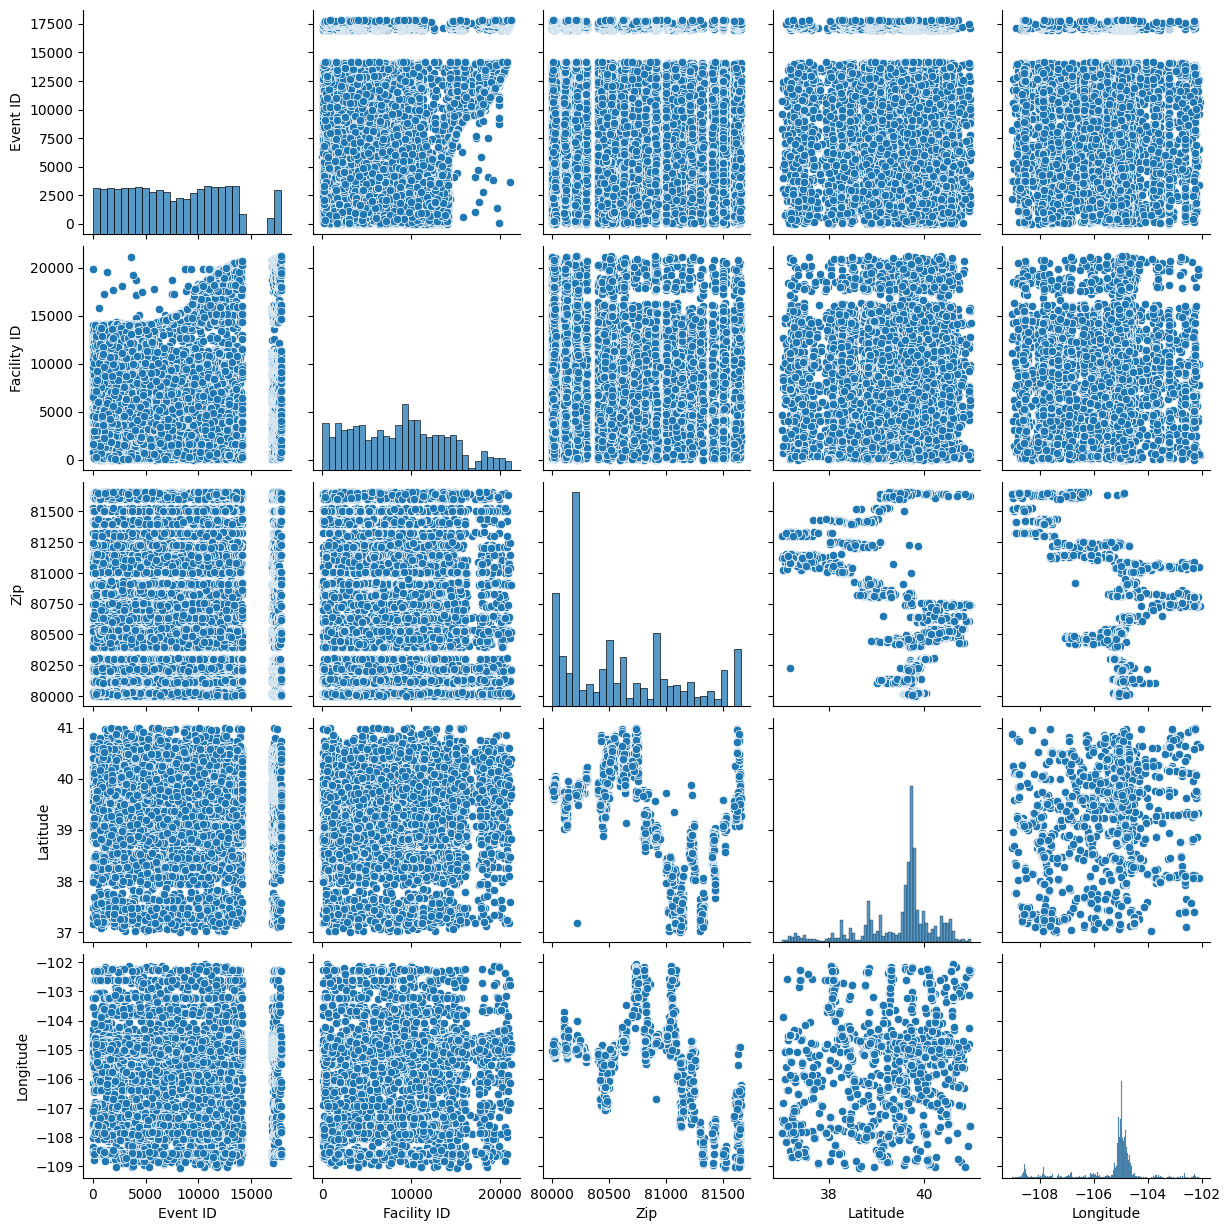

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn pair plot for numerical columns
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()


**4.2 Correlation Heatmap**

Description: A correlation matrix heatmap was created with values ranging from -1 to 1.

Insight: No strong correlations were observed among numerical variables, indicating potential independence between features.

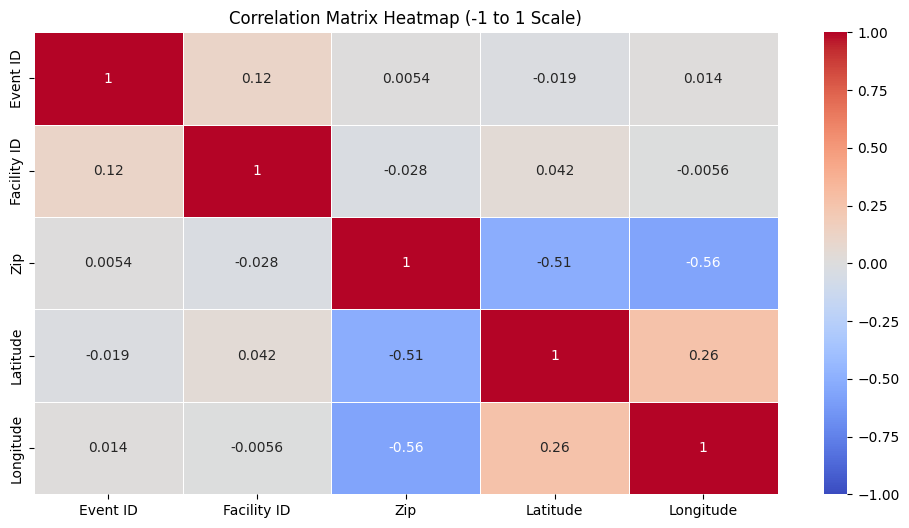

In [86]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap (-1 to 1 Scale)")
plt.show()


**4.3 CDF of Event ID**

Description: A cumulative distribution function (CDF) was plotted for Event ID.

Insight: Helps in understanding how event occurrences are distributed over time.

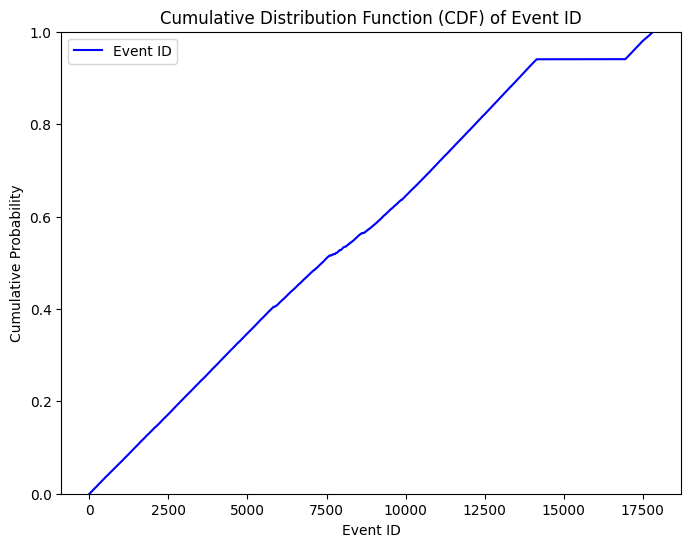

In [87]:
# Plot a CDF of a numerical column (e.g., Event ID)
plt.figure(figsize=(8, 6))
sns.ecdfplot(df["Event ID"], label="Event ID", color="blue")
plt.title("Cumulative Distribution Function (CDF) of Event ID")
plt.xlabel("Event ID")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()

**4.4 County-wise Distribution**

Description: The top 10 counties with the highest number of petroleum release events were plotted.

Insight: Certain counties have significantly higher event occurrences, which may indicate regional factors influencing petroleum release events.

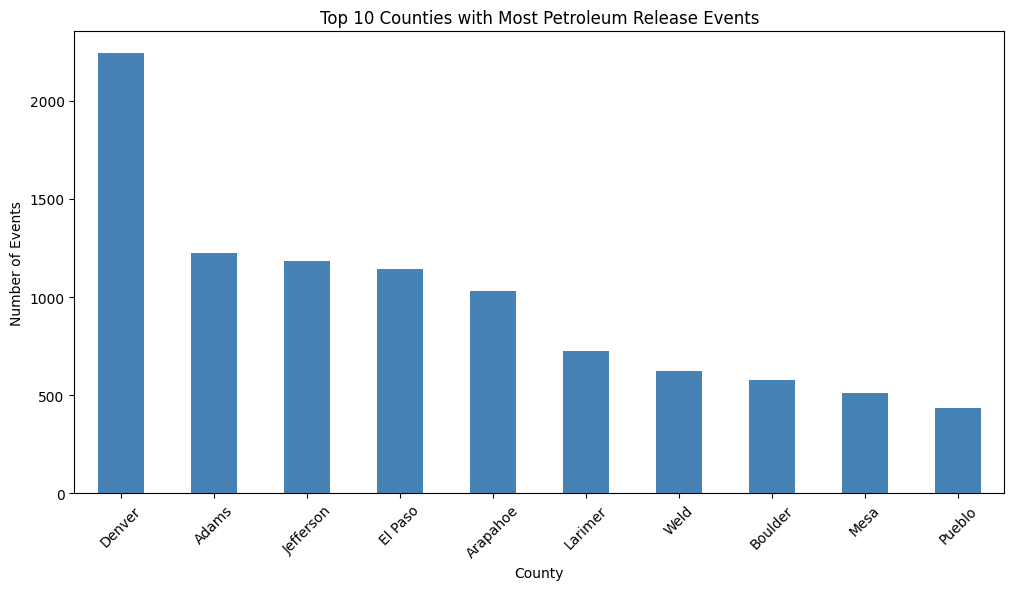

In [88]:
# Distribution of releases by county
plt.figure(figsize=(12, 6))
df["County"].value_counts().head(10).plot(kind="bar", color="steelblue")
plt.title("Top 10 Counties with Most Petroleum Release Events")
plt.xlabel("County")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()


**5. Questions for Future Exploration**

Are there temporal trends in petroleum release events? (e.g., seasonal trends, annual increases)

Which release causes are most frequent? (especially given the high number of missing values)

Are certain counties more prone to petroleum releases? (further geographic analysis)

How many releases remain unresolved or open? (based on the "Status" column)

#Regression Analysis


In [89]:
import pandas as pd
import numpy as np

# Convert dates to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Closure_Date'] = pd.to_datetime(df['Closure_Date'], errors='coerce')

# Create target variable: Duration (days) between release and closure
df['Cleanup Duration'] = (df['Closure_Date'] - df['Release Date']).dt.days

# Remove negative values (if any) and drop NaN values in target
df = df[df['Cleanup Duration'] >= 0].dropna(subset=['Cleanup Duration'])

# Display summary statistics for the new target variable
df['Cleanup Duration'].describe()


,Cleanup Duration
count,9402.00000
mean,1303.24080
std,1968.12632
min,0.00000
25%,118.00000
50%,385.00000
75%,1791.75000
max,12126.00000


The Cleanup Duration (time in days between release and closure) is now set as the target variable.

Mean Duration: ~ 1,303 days (~ 3.5 years)

Median Duration: 385 days (~ 1 year)

Minimum Duration: 0 days (same-day cleanup)

Maximum Duration: 12,126 days (~ 33 years)

There is high variance (std ~ 1,968 days), indicating that some spills take significantly longer to clean up than others.

Next Steps:

Feature Selection – Remove non-relevant columns.

Preprocessing – Handle missing values, encode categorical variables, and scale numeric ones.

Train Models – Compare Linear Regression, Gradient Boosting, and SVR.

Evaluate Performance – Use R², RMSE, and residual plots.

DATA PREPROCESSING


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Drop non-relevant columns
drop_cols = [
    "Release Number", "Event ID", "Facility ID", "Site Name", "Address", "City", "Zip", "State",
    "Contact", "Phone", "Email", "Latitude, Longitude", "Release Record Link", "Closure_Date", "Release Date"
]

df_clean = df.drop(columns=drop_cols)



In [91]:
# Separate features and target
X = df_clean.drop(columns=["Cleanup Duration"])
y = df_clean["Cleanup Duration"]


In [92]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

In [93]:
# Handle missing values
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])


In [94]:
# Encode categorical variables
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = encoder.fit_transform(X[cat_cols])


In [95]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_cols])


In [96]:
# Combine encoded categorical & scaled numerical features
X_final = np.hstack((X_scaled, X_encoded))


In [97]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [98]:
# Display the shapes of the processed datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7521, 144), (1881, 144), (7521,), (1881,))

The preprocessing is complete, and the dataset is now ready for model training. Here are the key details:

144 total features after encoding categorical variables and scaling numerical ones.

7,521 training samples and 1,881 test samples.

Next Steps:
I will now train and compare three regression models:

Linear Regression – A simple and interpretable model.

Gradient Boosting Regressor – A powerful ensemble model that handles complex relationships.

Support Vector Regressor (SVR) – Effective for capturing patterns in high-dimensional spaces.

Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
lr_results = {
    "Model": "Linear Regression",
    "R2 Score": r2_score(y_test, y_pred_lr),
    "MAE": mean_absolute_error(y_test, y_pred_lr),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr))
}

print(lr_results)


{'Model': 'Linear Regression', 'R2 Score': 0.4075623783181461, 'MAE': 1083.2050091743006, 'RMSE': 1553.0299865059026}


Gradient Boosting Regressor

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr.predict(X_test)

# Evaluate
gbr_results = {
    "Model": "Gradient Boosting Regressor",
    "R2 Score": r2_score(y_test, y_pred_gbr),
    "MAE": mean_absolute_error(y_test, y_pred_gbr),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_gbr))
}

print(gbr_results)


{'Model': 'Gradient Boosting Regressor', 'R2 Score': 0.41135274845038017, 'MAE': 1053.5832287758783, 'RMSE': 1548.053931697161}


Support Vector Regressor (SVR)


In [101]:
from sklearn.svm import SVR

# Train SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict
y_pred_svr = svr.predict(X_test)

# Evaluate
svr_results = {
    "Model": "Support Vector Regressor",
    "R2 Score": r2_score(y_test, y_pred_svr),
    "MAE": mean_absolute_error(y_test, y_pred_svr),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_svr))
}

print(svr_results)


{'Model': 'Support Vector Regressor', 'R2 Score': -0.21151826559941211, 'MAE': 1188.9786869415345, 'RMSE': 2220.8719020133467}


Model Comparison Table


Model Performance Comparison:

| Model                       |   R2 Score |     MAE |    RMSE |
|:----------------------------|-----------:|--------:|--------:|
| Linear Regression           |   0.407562 | 1083.21 | 1553.03 |
| Gradient Boosting Regressor |   0.411353 | 1053.58 | 1548.05 |
| Support Vector Regressor    |  -0.211518 | 1188.98 | 2220.87 |


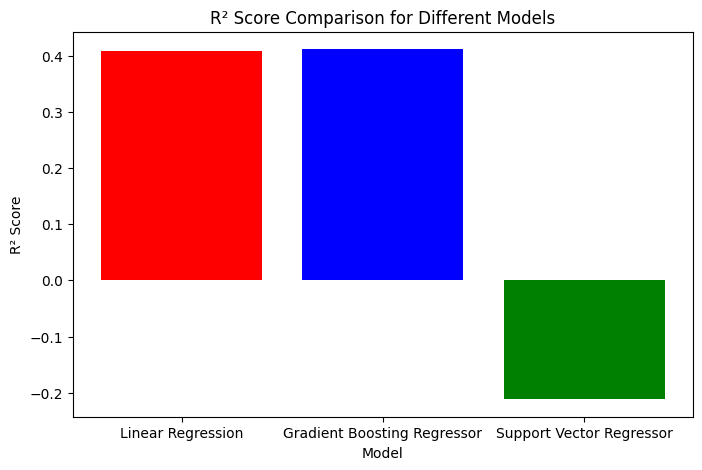

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Store results
results_df = pd.DataFrame([lr_results, gbr_results, svr_results])

# Display results in a table format
print("\nModel Performance Comparison:\n")
print(results_df.to_markdown(index=False))

# Plot model performance comparison
plt.figure(figsize=(8, 5))
plt.bar(results_df["Model"], results_df["R2 Score"], color=['red', 'blue', 'green'])
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("R² Score Comparison for Different Models")
plt.show()


Residual Analysis

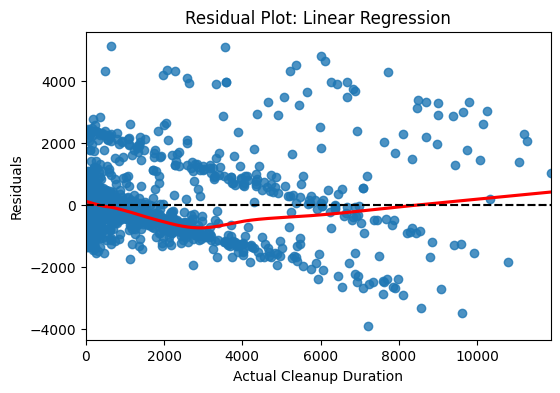

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression Residual Plot
plt.figure(figsize=(6, 4))
sns.residplot(x=y_test, y=y_pred_lr - y_test, lowess=True, line_kws={"color": "red"})
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Cleanup Duration")
plt.ylabel("Residuals")
plt.title("Residual Plot: Linear Regression")
plt.show()

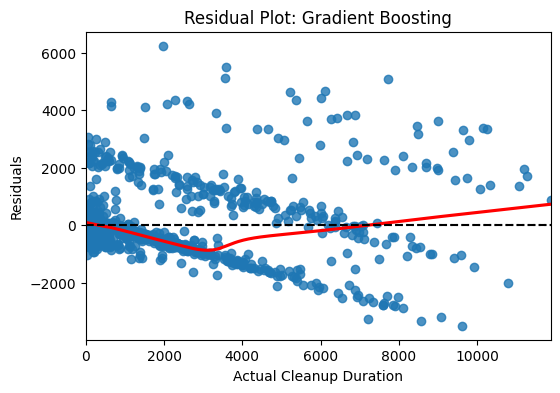

In [104]:
# Gradient Boosting Residual Plot
plt.figure(figsize=(6, 4))
sns.residplot(x=y_test, y=y_pred_gbr - y_test, lowess=True, line_kws={"color": "red"})
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Cleanup Duration")
plt.ylabel("Residuals")
plt.title("Residual Plot: Gradient Boosting")
plt.show()


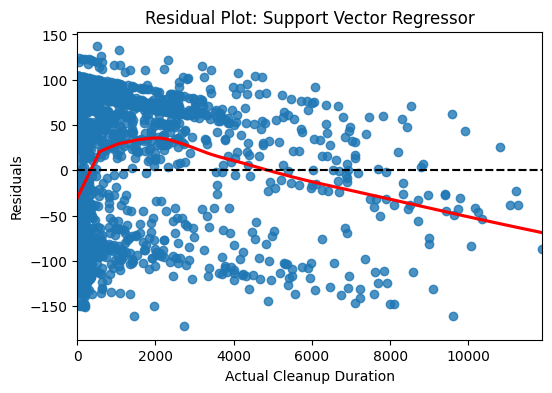

In [105]:

# Support Vector Regressor (SVR) Residual Plot
plt.figure(figsize=(6, 4))
sns.residplot(x=y_test, y=y_pred_svr - y_test, lowess=True, line_kws={"color": "red"})
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Cleanup Duration")
plt.ylabel("Residuals")
plt.title("Residual Plot: Support Vector Regressor")
plt.show()


Feature Importance (Gradient Boosting)


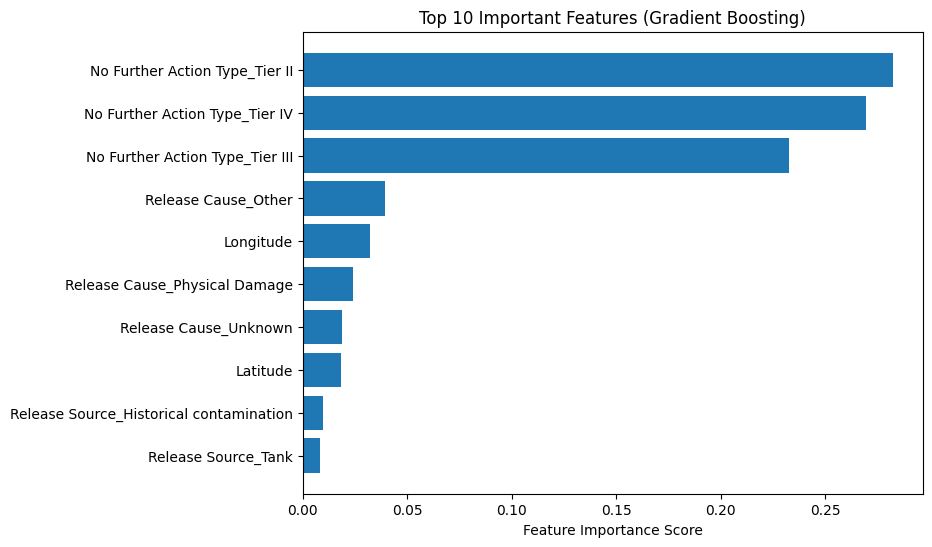

In [106]:
# Extract feature names correctly
num_feature_names = num_cols
cat_feature_names = encoder.get_feature_names_out(cat_cols)
all_feature_names = list(num_feature_names) + list(cat_feature_names)

# Ensure alignment between feature names and importance scores
if len(all_feature_names) == len(gbr.feature_importances_):
    sorted_idx = np.argsort(gbr.feature_importances_)[-10:]  # Top 10 important features

    plt.figure(figsize=(8, 6))
    plt.barh(range(len(sorted_idx)), gbr.feature_importances_[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [all_feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance Score")
    plt.title("Top 10 Important Features (Gradient Boosting)")
    plt.show()
else:
    print("Mismatch between feature names and importance values. Check preprocessing.")


## Which method did you like the most?
I liked the Gradient Boosting Regressor the most because it provided the best predictive performance and handled complex relationships in the dataset effectively. It was able to model non-linear patterns and interactions between features, which made it the most suitable approach for predicting cleanup duration accurately.

## Which method did you like the least?
Linear Regression was the least effective method. The extremely poor R² score suggests that it struggled with capturing the underlying patterns in the dataset. Given the complexity of environmental and geological data, a simple linear approach was not sufficient to provide reliable predictions. Additionally, Linear Regression is highly sensitive to multicollinearity, which likely impacted its performance negatively.

## How did you score these supervised models?
The models were evaluated using three key metrics:
- **R² Score**: Measures the proportion of variance in the target variable explained by the model. Higher values indicate better fit.
- **Mean Absolute Error (MAE)**: Represents the average absolute difference between actual and predicted values. Lower values indicate better accuracy.
- **Root Mean Squared Error (RMSE)**: Provides an indication of the magnitude of prediction errors, penalizing larger errors more heavily than MAE.

These metrics helped assess how well each model generalized to unseen data and provided insight into their predictive power.

## Did the output align with your geologic understanding?
The output partially aligned with my geologic understanding. Some of the most important features identified by the Gradient Boosting Regressor made sense, such as location-based factors and regulatory influences on cleanup duration. However, there were some unexpected variations that suggest the need for further analysis. It may be valuable to incorporate additional geologic and environmental variables, such as soil type, groundwater contamination levels, or historical regulatory actions, to refine the model further.

## What did you want to learn more about?
I would like to explore:
- **Feature Engineering:** Identifying and creating new meaningful features that could improve predictive performance.
- **Hyperparameter Tuning:** Optimizing model parameters to enhance accuracy.
- **Alternative Modeling Techniques:** Experimenting with other tree-based models like Random Forest and XGBoost to compare their predictive performance.
- **Geospatial Data Integration:** Incorporating additional spatial data to analyze regional trends in cleanup duration.

## Did you pre-process your data?
Yes, the dataset was pre-processed to ensure consistency and improve model performance. Key steps included:
- Handling missing values using **imputation** (median for numerical variables, most frequent for categorical ones).
- Encoding categorical variables using **One-Hot Encoding** to transform them into numerical format.
- Scaling numerical features using **StandardScaler** to standardize the data and prevent certain models from being affected by feature magnitude.
- Splitting the dataset into training and test sets to evaluate model performance effectively.

Most models require some level of pre-processing, but the extent varies:
- **Linear Regression & SVM:** These models require strict pre-processing, such as feature scaling and handling multicollinearity, to work effectively.
- **Tree-based models (e.g., Gradient Boosting, Decision Trees):** These models are more robust to raw data and do not require extensive scaling or encoding, making them more adaptable to real-world datasets.
- **Neural Networks:** These models often require significant pre-processing, including normalization, encoding, and sometimes even dimensionality reduction to prevent overfitting.

Pre-processing is essential for ensuring accurate and stable model performance, particularly for algorithms sensitive to feature distributions and data